# ISLR Chapter Lab 4.6
# Lab: Logistic Regression, LDA, QDA, and KNN


In this lab we will go over how to perform logistic regression, linear and quadratic discriminant analysis, and k-nearest neighbors in order to predict categorical responses in `R`.

## The Stock Market Data

First, we'll look at some numerical and graphical summaries of the `Smarket` data set from the `ISLR` library. It consists of the percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, there are the following pieces of information:

- `Lag1` through `Lag5`: the percentage returns for each of the five previous trading days
- `Volume`: the number of shares traded on the previous day, in billions
- `Today`: the percentage return on the date in question
- `Direction`: whether the market was `Up` (positive percentage return) or `Down` (negative percentage return) on this date.

Let's load the ISLR library and then also export the `Smarket` set to a CSV file for future use when I go back to do this lab in Python. After that, we'll take a peak at a basic summary of the set. 

In [75]:
install.packages("ISLR", repos='http://cran.us.r-project.org')
library(ISLR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
write.csv(Smarket, "Smarket.csv")

In [77]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [78]:
dim(Smarket)

[1] 1250    9

In [79]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

Lastly, before moving forward, we'll produce a scatterplot matrix of all the variables in the set.

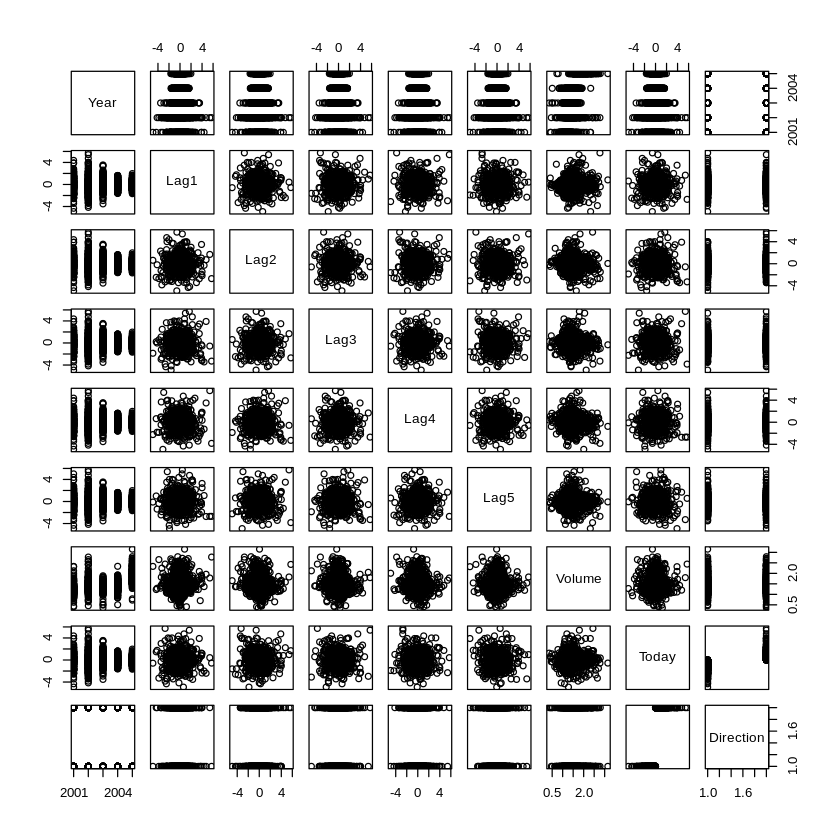

In [80]:
pairs(Smarket)

Next, let's produce a matrix of all the pairwise correlations among the variables in the data set. Note that since `Direction` is a qualitative variable we need to exclude it when using the `cor()` function. Otherwise, we'll get an error.

In [81]:
cor(Smarket[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


Looking at the last row, we see that the correlations between the lag variables and today's returns are close to zero, which means that there appears to be little correlation between today's returns and the returns from previous days. The only substantial correlation is between `Year` and `Volume`, with a value of 0.539. We can plot the data to see that `Volume` is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

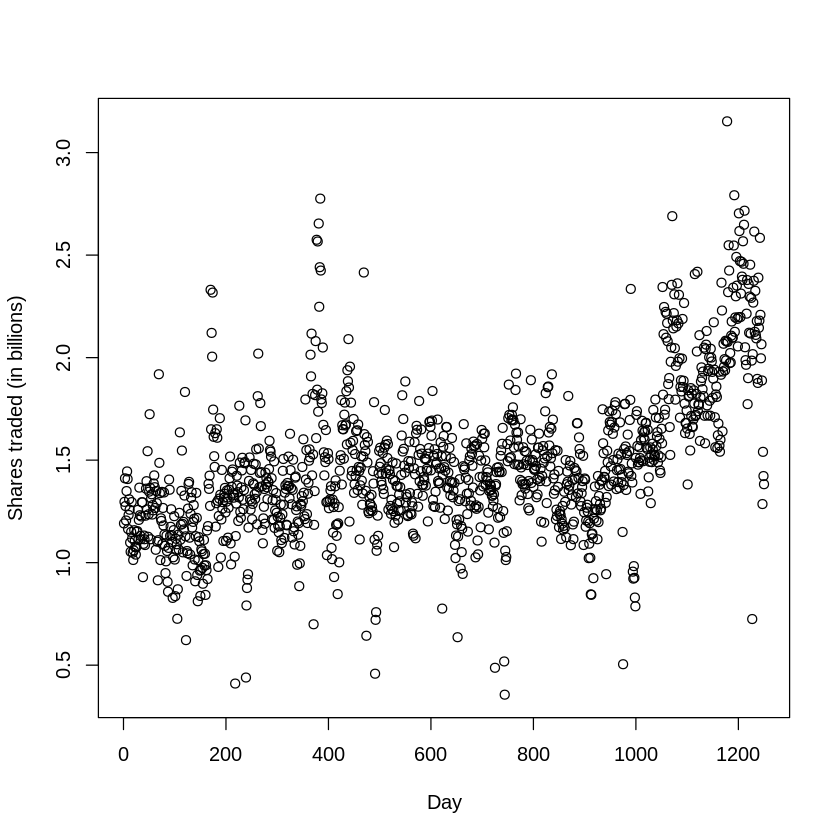

In [82]:
plot(Smarket$Volume, xlab = "Day", ylab = "Shares traded (in billions)")

## Logistic Regression

We'll start off by fitting a logistic regression model in order to predict `Direction` using `Lag1` through `Lag5` and `Volume`. To do this, we'll use the `glm()` function, which fits *generalized linear models*, which is a class of models that includes linear regression. While the syntax for `glm()` is quite similar to that of `lm()`, we must pass in the additional argument `family` in order to tell `R` what kind of generalize linear model we are using. For logistic regression, we use `family = binomial`.

In [83]:
glm.fits = glm(Direction ~ . - Year - Today, data = Smarket, family = binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ . - Year - Today, family = binomial, 
    data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


While `Lag1` has the smallest p-value among all of the coefficient estimates, it still has a value of 0.145, which is still relatively large. Thus, even though the negative coefficient for `Lag1` suggests that if the market had a positive return yesterday, then it is less likely to go up today, there isn't any clear evidence of a real association between `Lag1` and `Direction`.

As discussed in Lab 2, we can use the `coef()` function to access just the coefficients of the fitted model. In addition, we can also use the `summary()` function to access particular aspects of the fitted model, such as the p-values for the coefficients.

In [84]:
coef(glm.fits)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [85]:
summary(glm.fits)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [86]:
summary(glm.fits)$coef[, 4]

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In order to make a prediction, we use the `predict()` function to use the model to compute the probability that the market will go up for a set of given values of the predictors. Note that we need to specify that `type = "response"` in order to tell `R` to output probabilities of the form $P(Y = 1 | X)$, as oppsed to other information souch as the logit. If we don't supply a data set to the `predict()` function, then it will compute the probabilties for the training data that was used to fit the model. Here are the first ten probabilities that `predict()` computed.

In [87]:
glm.probs = predict(glm.fits, type = "response")

In [88]:
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

These values correspond to the probability of the market going up, rather than down, since `R` created a dummy variable with value 1 for `Up` and 0 for `Down`. We can verify this using the `contrasts()` function

In [89]:
contrasts(Smarket$Direction)

,Up
Down,0
Up,1


To make it easier for us to make predictions as to whether the market will go up or down on a particular day, we convert the predicted probabilities into class labels `Up` or `Down`. First, we create a vector of 1,250 `Down` entries.

In [90]:
glm.pred = rep("Down", 1250)

Next, we use a boolean mask to change all of the elements for which the predicted probability of a market increase exceeds 0.5 from `Down` to `Up`.

In [91]:
glm.pred[glm.probs > 0.5] = "Up"

With these predictions in hand, we can use the `table()` function to produce a confusion matrix in order to determine how many observations were correctly or incorrectly labeled.

In [92]:
table(glm.pred, Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

The diagonal of the confusion matrix represents correct predictions, while the off-diagonal represents incorrect predictions. Thus, the model correctly predicted that the market would go up on 507 days and go down on 145 days, for a total of 652 correct prediction. This means that logistic regression correctly predicted the movement of the market $652/1250 = 52.16\%$ of the time. Another way we can compute this is to use the `mean()` function.

In [93]:
mean(glm.pred == Smarket$Direction)

[1] 0.5216

This works because the `glm.pred == Smarket$Direction` is a boolean vector, and in the context of the `mean()` function the value `TRUE` is treated as 1 and `FALSE` is treated as 0.

Note that this correct prediction rate of 52.16% comes from testing our logistic regression model on the same data set we used for training. In other words, our *training* error rate is 47.84. Since the training error rate tends to underestimate the test error rate, the correct prediction rate isn't as good as it might initially seem. One way we can better assess the accuracy of the logistic regression model in this setting is to fif the model using part of the data, and then examine how well it performs when predicting the *held out* data. Since in practice we are more interested with how well our model performs on days in the future for which the market's movements are unknown, this will yield a more realistic error rate. In order to implement this strategy, we'll again use a boolean mask to separate out the observations from 2001 through 2004 from the observations from 2005.

In [94]:
train = (Smarket$Year < 2005)

To start with, we create a boolean mask where each element is either `TRUE` if it corresponds to an observation that occurred before 2005 or `FALSE` if it corresponds to an observation that occurred in 2005.

In [95]:
Smarket.2005 = Smarket[!train, ]

We then use the mask to pick out the submatrix of the stock market data set which consists of all columns, and only the rows for which the elements of `train` are false. In other words, `Smarket.2005` is a copy of the submatrix of `Smarket` consisting only of all observations from 2005. Note that we didn't need to create the mask `train` separately, but doing so is good practice to allow us to easily manipulate our training set in a single place.

In [96]:
identical(Smarket.2005, Smarket[!(Smarket$Year < 2005), ])

[1] TRUE

In addition, creating the mask separately saves us a little bit of typing when fitting a logistic regresison model using only the subset of the observations that correspond to dates before 2005. To do so, we use the `subset` argument.

In [97]:
glm.fits = glm(Direction ~ . - Year - Today, data = Smarket, family = binomial, subset = train)
glm.probs = predict(glm.fits, Smarket.2005, type = "response")

Again we emphasize that we trained and tested our model on two completely separate data sets: we used only the dates from before 2005 for training, and only used dates from 2005 for testing. Again lets compute the predictions for 2005 and compare them to the actual movements of the market over that time period.

In [98]:
glm.pred = rep("Down", dim(Smarket.2005)[1])
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Smarket.2005$Direction)

        
glm.pred Down Up
    Down   77 97
    Up     34 44

In [99]:
mean(glm.pred == Smarket.2005$Direction)

[1] 0.4801587

In [100]:
mean(glm.pred != Smarket.2005$Direction)

[1] 0.5198413

Here, we see that when we used separate training and testing sets the test error rate is about 52%, which is worse than random guessing! This suggests that we should try to experiment some more to see if we can improve our model. One thing we can try is removing the variables that didn't seem to be helpful in predicting `Direction` and refit the logistic regression model. As we recall, none of the p-values for the predictors were particularly small, even the smallest one which corresponded to `Lag1`. Since using predictors that have no relationship with the response increase the variance of a model without a corresponding decrease in bias, they therefore tend to negatively impact the test error rate. Let's try refitting the logistic regression using just `Lag1` and `Lag2`, which seemed to have the highest predictive power in the original logistic regression model.

In [101]:
glm.fits = glm(Direction ~ Lag1 + Lag2, data = Smarket, family = binomial, subset = train)
glm.probs = predict(glm.fits, Smarket.2005, type = "response")
glm.pred = rep("Down", dim(Smarket.2005)[1])
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Smarket.2005$Direction)

        
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [102]:
mean(glm.pred == Smarket.2005$Direction)

[1] 0.5595238

Here things look a little better, since about 56% of the daily movements in 2005 were correctly predicted. However, if we predicted that the market would increase every day we would also have the same error rate.

In [103]:
mean(Smarket.2005$Direction == "Up")

[1] 0.5595238

Thus, in terms of the overall error rate, logistic regression is no better than naively predicting that the market would increase every day. However, when we examine the confusion matrix a little more closely we can see that on days when logistic regression predicts an increase in the maket, it has a slightly better accuracy rate of $106 / (106 + 76) = 0.582$. This suggests a possible strategy of buying on days when the model predicts an increasing market, and avoiding trades when the model predicts a decreasing market. Without further investigation, though, we do not know if this small improvement is real or just due to random chance.

Lastly, if we wish to predict the returns associated with particular values of `Lag1` and `Lag2`, such as on a day when `Lag1 = 1.2` and `Lag2 = 1.1`, or on a day when `Lag1 = 1.5` and `Lag2 = -0.8`, we can do this using the `predict()` function.

In [104]:
predict(glm.fits, newdata = data.frame(Lag1 = c(1.2, 1.5), Lag2 = c(1.1, -0.8)), type = "response")

1         2 
0.4791462 0.4960939

## Linear Discriminant Analysis

Next, we'll perform linear discriminant analysis (LDA) on the `Smarket` data. In order to do so, we'll need to load the `MASS` library in order to use the `lda()` function. Aside from the absense of the `family` option, the syntax for `lda()` is the same as that for `lm()` and `glm()`. Just as we did with the second attempt at using logistic regression, we'll only use the observations from before 2005 to fit the model, and we'll only use `Lag1` and `Lag2` as the predictors.

In [147]:
library(MASS)

In [148]:
lda.fit = lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

In [149]:
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

First, we note that the LDA output indicates that the estimated prior probabilities of the groups are $\hat{\pi}_1 = 0.492$ and $\hat{\pi}_2 = 0.508$. This means that 49.2% of the training observations correspond to days during which the market went down and 50.8% of the training observations correspond to days during which the market went up. In addition, the output also provides the averages of each predictor within each class (e.g. the average value of `Lag1` for days in which the market went down is 0.0428), which are used in LDA as estimates of the actual group means $\mu_k$. These suggest that there is a tendency for the previous two days' returns to be negative on the days when the market increases, and a tendency for the previous two days' returns to be positive on the days when the market decreases. Lastly, the *coefficients of linear discriminants* portion of the output provides the linear combination of `Lag1` and `Lag2` that are used to form the LDA decision rule. In other words, you can intuitively think that these are the multipliers of the elements of $X = x$ in the formula

\begin{equation}
    \delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log(\pi_k).
\end{equation}

However, it is important to note that the values given by `lda()` ***are not*** the actual multipliers of the elements of $X = x$ in the above formula, as [they are normalized so that the within groups covariance is spherical](https://www.rdocumentation.org/packages/MASS/versions/7.3-51.4/topics/lda). Instead they are scaled coefficients which are discussed more in detail in [this stats.stackexchange post](https://stats.stackexchange.com/a/48859).

Recall that in the fomula $\Sigma$ is the $2 \times 2$ covariance matrix of `Lag1` and `Lag2`; $\mu_k$ is the vector of the group means of `Lag1` and `Lag2` for either the group `Down` or the group `Up`; $\pi_k$ is the estimated prior probability of either `Down` or `Up`. Strictly speaking, since we are using estimates in the model, $\Sigma$, $\mu_k$, and $\pi_k$ should be replaced with their hatted versions. Also recall that this formula is the vector/matrix version of

\begin{equation}
    \delta_k = x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k).
\end{equation}

More concretely, if $-0.642 \times$ `Lag1` $- 0.514 \times$ `Lag2` is large, then the LDA classifier will predict a market increase; if it is small, then the LDA classifier will predict a market decline. We can produce plots of the *linear discriminants*, obtained by computing $-0.642 \times$ `Lag1` $- 0.514 \times$ `Lag2` for each of the training observations, using the `plot()` function on `lda.fit`.

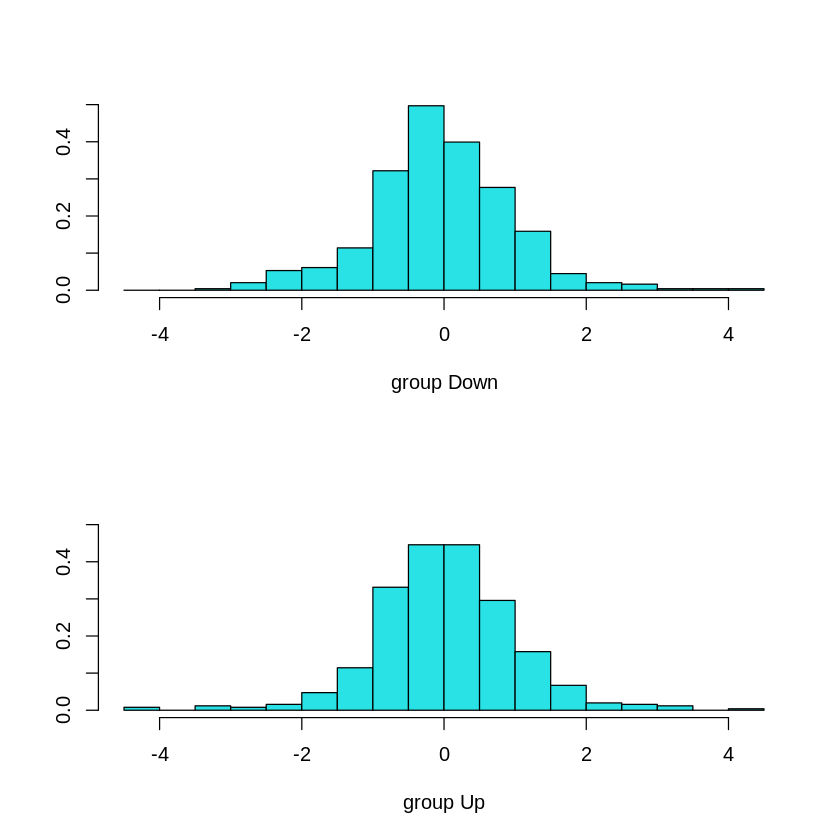

In [108]:
plot(lda.fit)

Using the `predict()` function on `lda.fit` returns a list with three elements.

- `class` contains LDA's predictions about the movement of the market.
- `posterior` is a matrix whose $k$th column contains the posterior probability that the corresponding observation belongs to the $k$th class. This is computed using Bayes' theorem.
- `x` contains the linear discriminants, as described earlier.

Recall that Bayes' theorem states that

\begin{equation}
    \text{Pr}(Y = k | X = x) = \frac{\pi_k f_k(x)}{\sum_{l = 1}^K \pi_l f_l(x)},
\end{equation}

where $K$ is the total number of classes for $Y$; $\pi_k$ is the overall, or *prior* probability that a randomly chosen observation comes from the $k$th class; and $f_k(x)$ is defined to be $\text{Pr}(X = x | Y = k)$, the probability that $X = x$ for an observation $X$ that comes from the $k$th class.

In [109]:
lda.pred = predict(lda.fit, Smarket.2005)

Recall that in Section 4.5 of the book, we saw that LDA and logistic regression often have similar performance. We see that this is the case for our stock market data. In fact, it just so happens that we have an identical confusion matrix and test accuracy number compared to the logistic regression model.

In [110]:
lda.class = lda.pred$class
table(lda.class, Smarket.2005$Direction)

         
lda.class Down  Up
     Down   35  35
     Up     76 106

In [111]:
mean(lda.class == Smarket.2005$Direction)

[1] 0.5595238

Notice that since there are two classes, LDA uses a posterior probability threshold of 50% in order to make the predictions that go into `class`.

In [112]:
head(lda.pred$posterior)

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438


In [113]:
head(lda.class)

[1] Up Up Up Up Up Up
Levels: Down Up

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, we can use a boolean mask with the matrix of posterior probabilities. For example, let's suppose we wish to predict a market decrease only if we are very certain that it will indeed decrease on that day -- say, if the posterior probability of a decrease is at least 90%.

In [114]:
sum(lda.pred$posterior[, "Down"] > 0.9)

[1] 0

No days in 2005 meet that threshold. In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.

In [115]:
max(lda.pred$posterior[, "Down"])

[1] 0.520235

Moreover, the overall greatest posterior probability for all of 2005 is only 54.22%.

In [116]:
max(lda.pred$posterior)

[1] 0.5422133

## Quadratic Discriminant Analysis

Next, let's fit a quadratic discriminant analysis (QDA) model to the Smarket data. QDA is also part of the `MASS` library as the `qda()` function. It uses the same sytax as that of `lda()`

In [117]:
qda.fit = qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

While the output for the result of `qda()` is similar to that as `lda()` in that it includes the prior probabilities of the groups as well as the group means, it does not contain the coefficients of the linear discriminants. This is because the QDA classifier involves a quadratic, not linear, function of the predictors. Recall that in QDA the formula $\delta_k(x)$, the posterior probability that the observation $X = x$ is a member of the $k$th class, is

\begin{align}
    \delta_k(x) &= -\frac{1}{2}(x - \mu_k)^T\Sigma_k^{-1}(x - \mu_k) - \frac{1}{2}\log|\Sigma_k| + \log(\pi_k) \\
    &= -\frac{1}{2}x^T\Sigma_K^{-1}x + x^T\Sigma_k^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma_k^{-1}\mu_k - \frac{1}{2}\log|\Sigma_k| + \log(\pi_k),
\end{align}

where observations from the $k$th class are normally distributed with (population) mean $\mu_k$ and (population) covariance matrix $\Sigma_k$. This comes from the assumption in QDA that each class has its own covariance matrix, which differs from the assumption in LDA that the classes had the same covariance matrix.

Even though the output for `qda()` is slightly different, the `predict()` function works in exactly the same fashion as for LDA.

In [118]:
qda.pred = predict(qda.fit, Smarket.2005)
qda.class = qda.pred$class
table(qda.class, Smarket.2005$Direction)

         
qda.class Down  Up
     Down   30  20
     Up     81 121

In [119]:
mean(qda.class == Smarket.2005$Direction)

[1] 0.5992063

Here, we see that the QDA predictions are accurate almost 60% of the time for the 2005 data, which wasn't used to fit the model. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, this model should be evaluated on a larger test set to get a better sense of its predictive strength.

As a side note, we can again use a boolean mask with the matrix of posterior probabilities to make predictions with a probability threshold that is different from 50%. Let's see what QDA says for the cautious scenario of using a 90% probability threshold to predict a decrease.

In [120]:
sum(qda.pred$posterior[, "Down"] > 0.9)

[1] 0

Again no days in 2005 meet this threshold, since the maximum posterior probability of a decrease in all of 2005 was just 52.24%, and the overall maximum posterior probability in all of 2005 was 54.62%.

In [121]:
max(qda.pred$posterior[, "Down"])

[1] 0.5224072

In [122]:
max(qda.pred$posterior)

[1] 0.5461849

## K-Nearest Neighbors

The last method of working with the `Smarket` data we'll use is K-nearest neighbors. To do this, we'll use the `knn()` function from the `class` library. This function works differently from the other model-fitting functions that we have encountered thus far since it forms predictions with a single command instead of the two-step approach of first fitting the model and then using it to make predictions. The function requires four inputs.

1. `train.X` is the matrix containing the predictors associated with the training data.
2. `test.X` is the matrix containing the predictors associated with the data for which we wish to make predictions.
3. `train.Direction` is a vector containing the class labels for the training observations.
4. `k` is the number of nearest neighbors to be used by the classifier.

We'll use `cbind()`, which is short for *column bind* to bind the `Lag1` and `Lag2` variables into our `train.X` and `test.X` matrices.

In [123]:
library(class)

In [124]:
train.X = cbind(Smarket$Lag1, Smarket$Lag2)[train, ]
test.X = cbind(Smarket$Lag1, Smarket$Lag2)[!train, ]
train.Direction = Smarket$Direction[train]

After this setup step, we use the `knn()` function to predict the market's movement for the dates in 2005. Note that in order to have consistency and have reproducibility for our results, we set a random seed before applying `knn()` since `R` randomly breaks any ties if several observations are tied as nearest neighbors.

In [125]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Smarket.2005$Direction)

        
knn.pred Down Up
    Down   43 58
    Up     68 83

Using $K = 1$, our results aren't very good, since only $(43 + 83)/252 = 50\%$ of the observations are correctly predicted. Of course, using $K=1$ is a very flexible fit, so perhaps it was too much flexibility. Let's try again using $K = 3$.

In [126]:
knn.pred = knn(train.X, test.X, train.Direction, k = 3)
table(knn.pred, Smarket.2005$Direction)

        
knn.pred Down Up
    Down   48 54
    Up     63 87

In [127]:
mean(knn.pred == Smarket.2005$Direction)

[1] 0.5357143

The results improved slightly to about 53.4% test accuracy, though further increasing $K$ does not provide any additional improvements. For this data, it appears that QDA provides the best results of the methods we have examined thus far.

## An Application to Caravan Insurance Data

Lastly, we'll use KNN with the `Caravan` data set from the `ISLR` library. This set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is `Purchase` which indicates whether or not a given individual purchases a caravan insurance policy. Again let's export a copy of this data to a CSV file for use when I do this lab in Python, and then explore it a little bit.

In [128]:
write.csv(Caravan, "Caravan.csv")

In this set, only about 6% of people purchased caravan insurance.

In [129]:
summary(Caravan$Purchase)

No  Yes 
5474  348

Before proceeding, we note that since the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Variables with a large scale will have a much larger effect on the *distance* between the observations, and hence on the KNN classifier, than variables that are on a small scale. For example, if we have a data set with the variables `salary` (measured in dollars) and `age` (measured in years), a difference of \\$1000 in salary is quite large compared to a difference of 50 years of age when it comes to computing distances in KNN. As a result, `salary` will dominate the KNN classification results while `age` will have almost no effect. Moreover, the importance of scale to the KNN classfier means that changing the units (such as measuring `salary` in Japanese yen, or measuring `age` in minutes) of the predictors could result in vastly different classification results compared to what we would get when using dollars and years.

One way to handle this problem is to *standardize* the data so that all variables are given a mean of zero and a standard deviation of one. Doing this will put all variables on a comparable scale. While we could do this by hand, it is much more convenient to use the `scale()` function. When doing this with the `Caravan` data, we exclude column 86, the qualitative `Purchase` variable.

In [130]:
standardized.X = scale(Caravan[,-86])

We can check the mean and variance of first two columns of `Caravan` and compare those with that of the standardized columns to confirm that the standardized ones have mean zero and standard deviation one.

In [131]:
mean(Caravan[, 1])

[1] 24.25335

In [132]:
mean(standardized.X[, 1])

[1] -7.025576e-17

In [133]:
mean(Caravan[, 2])

[1] 1.110615

In [134]:
mean(standardized.X[, 2])

[1] -1.470838e-16

Note that the standardized means aren't exactly equal to zero due to slight floating point precision errors.

In [135]:
var(Caravan[, 1:2])

,MOSTYPE,MAANTHUI
MOSTYPE,165.0378474,-0.2018823
MAANTHUI,-0.2018823,0.1647078


In [136]:
var(standardized.X[, 1:2])

,MOSTYPE,MAANTHUI
MOSTYPE,1.00000000,-0.03872126
MAANTHUI,-0.03872126,1.00000000


Now we split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations.

In [137]:
test = 1:1000
train.X = standardized.X[-test, ]
test.X = standardized.X[test, ]
train.Y = Caravan$Purchase[-test]
test.Y = Caravan$Purchase[test]

Once we have separated out the training and test observations, we start off by fitting a KNN model on the training data using $K = 1$ and then evaluate is performance on the test data.

In [138]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Y, k = 1)

In [139]:
mean(test.Y != knn.pred)

[1] 0.118

The KNN error rate with $K = 1$ is just under 12%, which appears to be pretty good at a first glance. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% just by always predicting `No` regardless of the values of the predictors.

In [140]:
mean(test.Y != "No")

[1] 0.059

While the overall error rate is rather low, depending on the situation we may be interested in other methods of measuring the quality of the model. For example, if there is some non-trivial cost to trying to sell insurance to a given individual, then the company would like to try and sell insurance only to customers who are likely to buy it. In that case, the company is more interested in the fraction of individuals that are correctly predicted to buy insurance.

In [141]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

Looking at the fraction of individuals that are correctly predicted to buy insurance, the KNN classifier with $K = 1$ does far better than random guessing among the customers that are predicted to buy insurance. Among the 77 customers it predicted to buy insurance, 9 (11.7%) of them actually do purchase insurance. This is double the rate one would obtain from random guessing.

We can also explore other values of $K$, such as $K = 3$ and $K = 5$, to see how performance changes.

In [142]:
knn.pred = knn(train.X, test.X, train.Y, k = 3)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

In [143]:
knn.pred = knn(train.X, test.X, train.Y, k = 5)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

With $K = 3$, the success rate of correctly predicting customers who buy insurance increases to $5/26 = 19\%$, and with $K = 5$ the rate is $4/15 = 26.7\%$. That is over four times the rate that we get from random guessing! This suggests that KNN is finding some real patterns in a difficult data set.

To compare, we can also fit a logistic regression model to the data.

In [144]:
glm.fits = glm(Purchase ~ ., data = Caravan, family = binomial, subset = -test)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [145]:
glm.probs = predict(glm.fits, Caravan[test, ], type = "response")
glm.pred = rep("No", 1000)
glm.pred[glm.probs > 0.5] = "Yes"
table(glm.pred, test.Y)

        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

As we can see, if we use 0.5 as the predicted probability cut-off for logistic regression, only seven of the test observations are predicted to purchase insurance. Even worse, all seven of these predictions are incorrect!

In [146]:
glm.probs = predict(glm.fits, Caravan[test, ], type = "response")
glm.pred = rep("No", 1000)
glm.pred[glm.probs > 0.25] = "Yes"
table(glm.pred, test.Y)

        test.Y
glm.pred  No Yes
     No  919  48
     Yes  22  11

We aren't required to use a cut-off of 0.5, though. If we instead use a cut-off of 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for 33% of these people. This is over five times better than random guessing!

Reference: https://www.kaggle.com/suugaku/islr-lab-3-r/